# ******Predicting Heart Disease using Machine Learning******

## *Data*

https://www.kaggle.com/datasets/sumaiyatasmeem/heart-disease-classification-dataset

In [578]:
df=pd.read_csv("data.csv")

### Libraries

In [579]:
# regular EDA(exploratory data analysis) and plotting libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# models
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier

# evaluation
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV 
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix,accuracy_score,classification_report,f1_score,precision_score,recall_score

In [580]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [581]:
df.shape

(303, 14)

In [582]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [583]:
df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [584]:
df.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [585]:
df.duplicated().sum()

np.int64(1)

In [586]:
df.drop_duplicates(inplace=True)

In [587]:
df.shape

(302, 14)

This will display the number of occurrences of the target value.

In [588]:
df.target.value_counts()

target
1    164
0    138
Name: count, dtype: int64

In [589]:
df.target.value_counts(normalize=True)*100

target
1    54.304636
0    45.695364
Name: proportion, dtype: float64

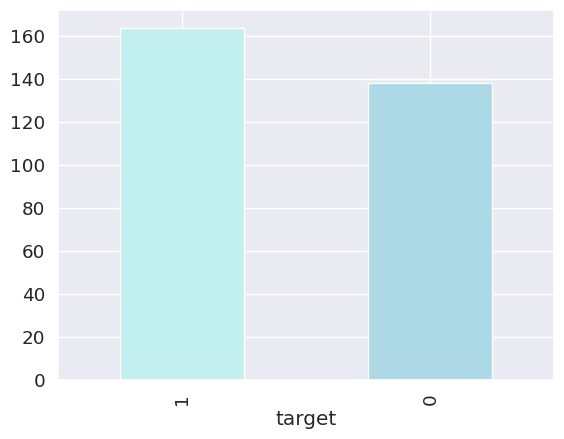

In [590]:
df.target.value_counts().plot(kind="bar", color=["#c2f0ee", "lightblue"]);

### The distribution is fairly even, confirming that the target column is balanced.

## Feature analysis

In [591]:
df.sex.value_counts()

sex
1    206
0     96
Name: count, dtype: int64

**Comparing target column with sex column**

In [592]:
pd.crosstab(index=df.target, columns=df.sex)

sex,0,1
target,,
0,24,114
1,72,92


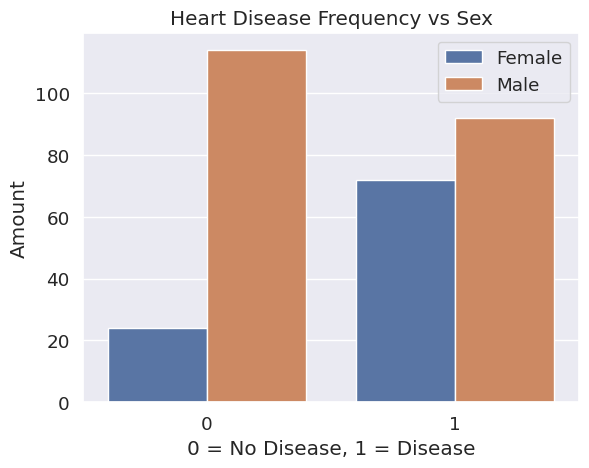

In [593]:
sns.countplot(df,x='target',hue='sex');
plt.title("Heart Disease Frequency vs Sex")
plt.xlabel("0 = No Disease, 1 = Disease")
plt.ylabel("Amount")
plt.legend(["Female", "Male"])
plt.xticks(rotation=0);

**Comparing age and maximum heart rate**

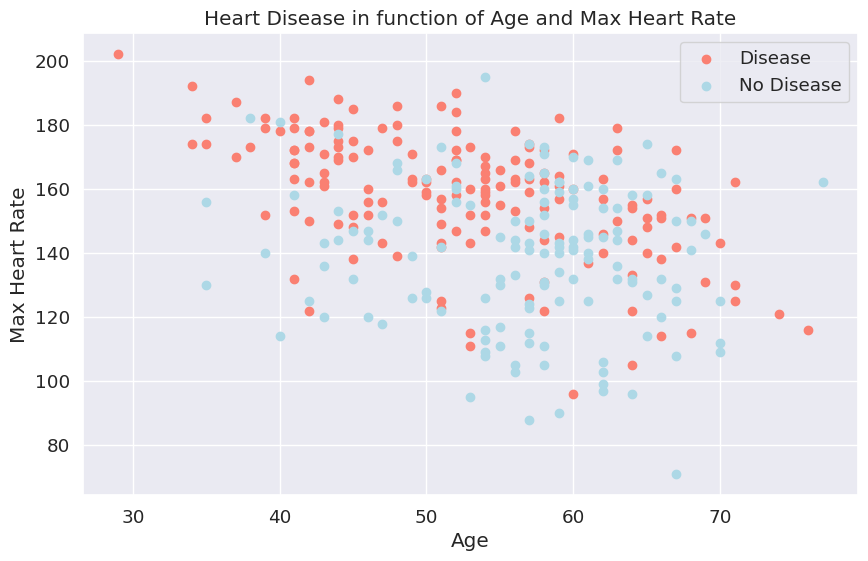

In [594]:
plt.figure(figsize=(10,6))

plt.scatter(df.age[df.target==1],df.thalach[df.target==1],c="salmon") 
plt.scatter(df.age[df.target==0],df.thalach[df.target==0],c="lightblue") # axis always come as (x, y)

plt.title("Heart Disease in function of Age and Max Heart Rate")
plt.xlabel("Age")
plt.legend(["Disease", "No Disease"])
plt.ylabel("Max Heart Rate");

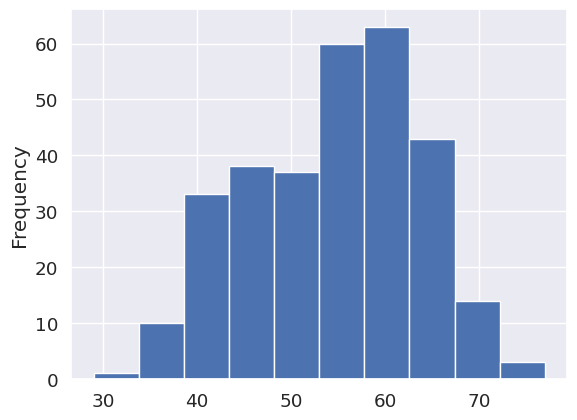

In [595]:
df.age.plot.hist();

**Comparing heart disease frequency and chest pain type**

In [596]:
pd.crosstab(index=df.cp, columns=df.target)

target,0,1
cp,,
0,104,39
1,9,41
2,18,68
3,7,16


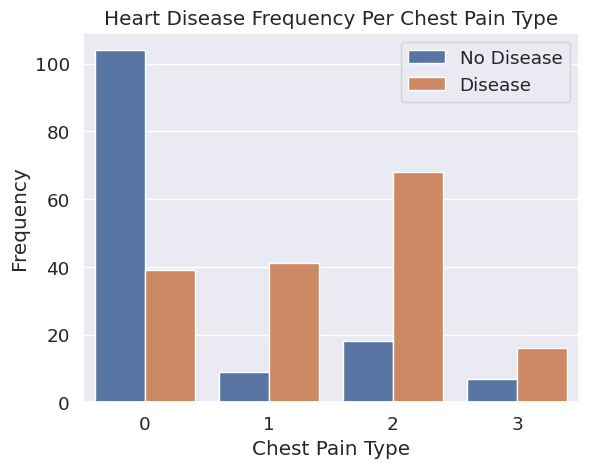

In [597]:
sns.countplot(df,x="cp",hue='target')
plt.title("Heart Disease Frequency Per Chest Pain Type")
plt.xlabel("Chest Pain Type")
plt.ylabel("Frequency")
plt.legend(["No Disease", "Disease"])
plt.xticks(rotation = 0);

### Correlation natrix

In [598]:
corr_matrix = df.corr()
corr_matrix 

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
age,1.000000,-0.094962,-0.063107,0.283121,0.207216,0.119492,-0.111590,-0.395235,0.093216,0.206040,-0.164124,0.302261,0.065317,-0.221476
sex,-0.094962,1.000000,-0.051740,-0.057647,-0.195571,0.046022,-0.060351,-0.046439,0.143460,0.098322,-0.032990,0.113060,0.211452,-0.283609
cp,-0.063107,-0.051740,1.000000,0.046486,-0.072682,0.096018,0.041561,0.293367,-0.392937,-0.146692,0.116854,-0.195356,-0.160370,0.432080
trestbps,0.283121,-0.057647,0.046486,1.000000,0.125256,0.178125,-0.115367,-0.048023,0.068526,0.194600,-0.122873,0.099248,0.062870,-0.146269
chol,0.207216,-0.195571,-0.072682,0.125256,1.000000,0.011428,-0.147602,-0.005308,0.064099,0.050086,0.000417,0.086878,0.096810,-0.081437
fbs,0.119492,0.046022,0.096018,0.178125,0.011428,1.000000,-0.083081,-0.007169,0.024729,0.004514,-0.058654,0.144935,-0.032752,-0.026826
restecg,-0.111590,-0.060351,0.041561,-0.115367,-0.147602,-0.083081,1.000000,0.041210,-0.068807,-0.056251,0.090402,-0.083112,-0.010473,0.134874
thalach,-0.395235,-0.046439,0.293367,-0.048023,-0.005308,-0.007169,0.041210,1.000000,-0.377411,-0.342201,0.384754,-0.228311,-0.094910,0.419955
exang,0.093216,0.143460,-0.392937,0.068526,0.064099,0.024729,-0.068807,-0.377411,1.000000,0.286766,-0.256106,0.125377,0.205826,-0.435601
oldpeak,0.206040,0.098322,-0.146692,0.194600,0.050086,0.004514,-0.056251,-0.342201,0.286766,1.000000,-0.576314,0.236560,0.209090,-0.429146


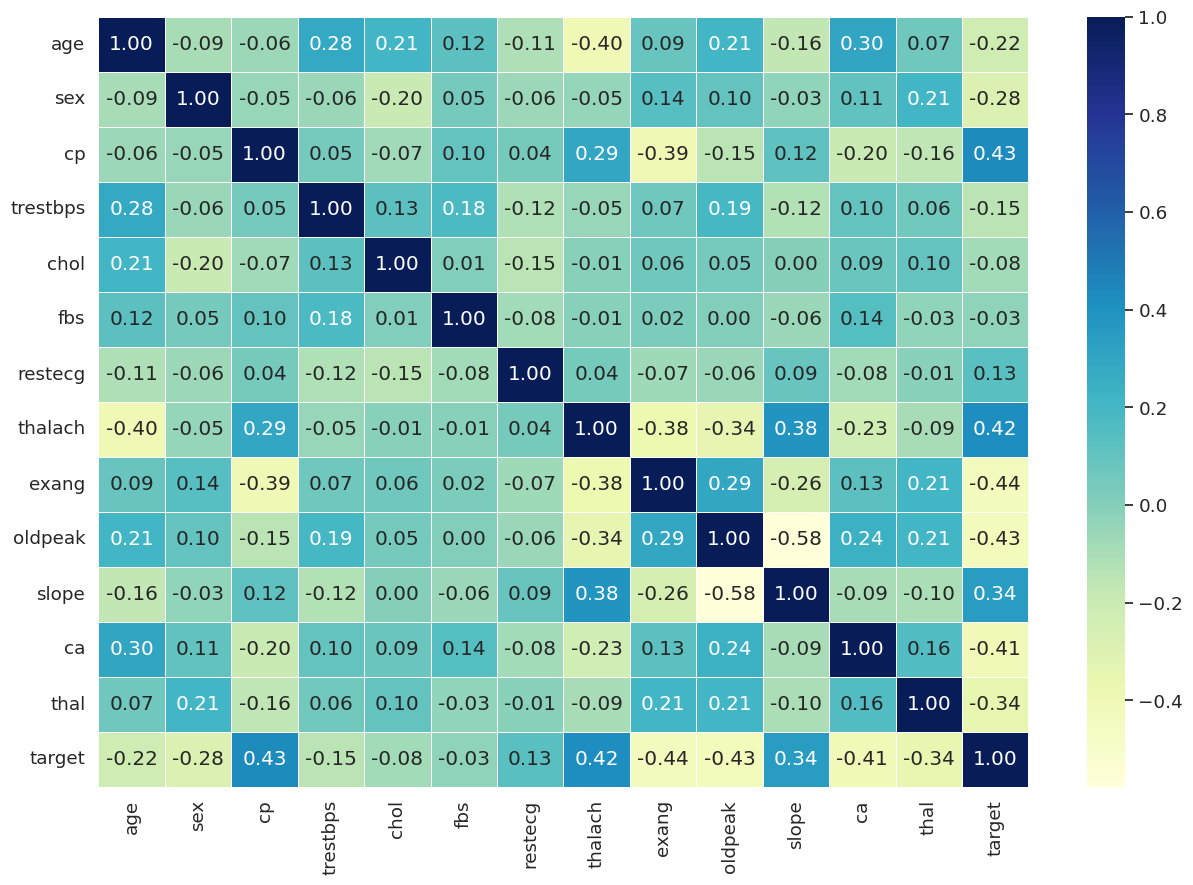

In [599]:
plt.figure(figsize=(15,10))
sns.heatmap(corr_matrix,annot=True,linewidths=0.5,fmt= ".2f",cmap="YlGnBu");

**A higher positive value means a potential positive correlation (increase) and a higher negative value means a potential negative correlation (decrease).**

## Modeling

In [600]:
# Everything except target variable
X = df.drop(labels="target", axis=1)
# Target variable
y = df.target

In [601]:
scaler = StandardScaler()
scaler.fit(X)
X_scaled = scaler.transform(X)

In [602]:
data=pd.DataFrame(X_scaled,columns=X.columns)
X = data.copy()

In [603]:
X.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
0,0.949794,0.682656,1.976470,0.764066,-0.261285,2.389793,-1.002541,0.018826,-0.698344,1.084022,-2.271182,-0.714911,-2.147955
1,-1.928548,0.682656,1.005911,-0.091401,0.067741,-0.418446,0.901657,1.636979,-0.698344,2.118926,-2.271182,-0.714911,-0.513994
2,-1.485726,-1.464866,0.035352,-0.091401,-0.822564,-0.418446,-1.002541,0.980971,-0.698344,0.307844,0.979514,-0.714911,-0.513994
3,0.174856,0.682656,0.035352,-0.661712,-0.203222,-0.418446,0.901657,1.243374,-0.698344,-0.209608,0.979514,-0.714911,-0.513994
4,0.285561,-1.464866,-0.935208,-0.661712,2.080602,-0.418446,0.901657,0.587366,1.431958,-0.382092,0.979514,-0.714911,-0.513994


In [604]:
y.head()

0    1
1    1
2    1
3    1
4    1
Name: target, dtype: int64

In [605]:
np.random.seed(45)
X_train, X_test, y_train, y_test = train_test_split(X, # independent variables 
                                                    y, # dependent variable
                                                    test_size = 0.2) 

#### **We are evaluating the performance of three different models.**

- Logistic regression
- Kneighbors classifier
- Random Forest

## For evaluation we are using 4 metrics 

- accuracy
- precision
- recall
- f1 score

In [606]:
# put models in a distionary

models = {"Logistic regression":LogisticRegression(),
          "Knn classifier":KNeighborsClassifier(),
          "Random Forest classifier":RandomForestClassifier()
}

def fit_and_score(models,X_train,X_test,y_train,y_test):
    np.random.seed(42)
    model_score = {}
    for name,model in models.items():
        # fit the models to the data
        model.fit(X_train,y_train)
        y_pred = model.predict(X_test)
        # Calculate evaluation metrics
        accuracy = accuracy_score(y_test, y_pred)
        precision = precision_score(y_test, y_pred)
        f1 = f1_score(y_test, y_pred)
        recall = recall_score(y_test,y_pred)
        model_score[name] = {
            'accuracy': accuracy,
            'precision': precision,
            'f1_score': f1,
            'recall': recall
        }
    return model_score
            

In [607]:
model_scores = fit_and_score(models=models,
                             X_train=X_train,
                             X_test=X_test,
                             y_train=y_train,
                             y_test=y_test)
model_scores

{'Logistic regression': {'accuracy': 0.8852459016393442,
  'precision': np.float64(0.8857142857142857),
  'f1_score': np.float64(0.8985507246376812),
  'recall': np.float64(0.9117647058823529)},
 'Knn classifier': {'accuracy': 0.8524590163934426,
  'precision': np.float64(0.8378378378378378),
  'f1_score': np.float64(0.8732394366197183),
  'recall': np.float64(0.9117647058823529)},
 'Random Forest classifier': {'accuracy': 0.8360655737704918,
  'precision': np.float64(0.8529411764705882),
  'f1_score': np.float64(0.8529411764705882),
  'recall': np.float64(0.8529411764705882)}}

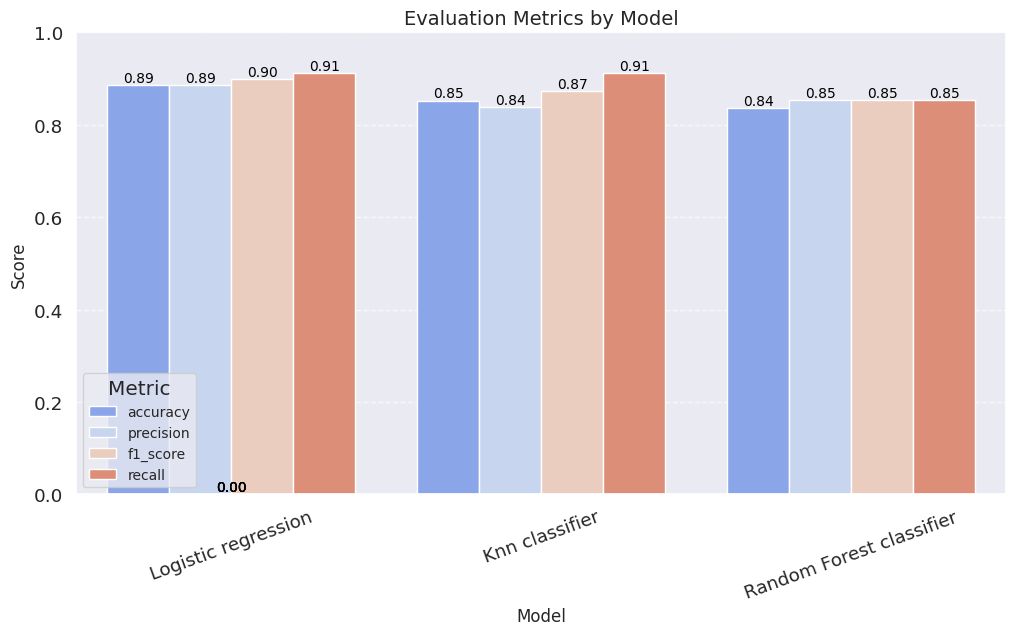

In [608]:
metrix_df = pd.DataFrame(model_scores).T 
metrix_df.reset_index(inplace=True)
metrix_df.rename(columns={'index': 'Model'}, inplace=True)

df_melted = metrix_df.melt(id_vars='Model', var_name='Metric', value_name='Score')

plt.figure(figsize=(12, 6))
ax = sns.barplot(x='Model', y='Score', hue='Metric', data=df_melted, palette='coolwarm')

for p in ax.patches:
    ax.annotate(f"{p.get_height():.2f}", 
                (p.get_x() + p.get_width() / 2., p.get_height()), 
                ha='center', va='bottom', fontsize=10, color='black')

# Formatting
plt.xlabel('Model', fontsize=12)
plt.ylabel('Score', fontsize=12)
plt.title('Evaluation Metrics by Model', fontsize=14)
plt.xticks(rotation=20)
plt.ylim(0, 1)
plt.legend(title='Metric', fontsize=10)
plt.grid(axis='y', linestyle='--', alpha=0.7)

plt.show()

In [609]:
# Logistic Regression
model_logistic = LogisticRegression()
model_logistic.fit(X_train,y_train)
# K neighbos classifier
model_kneighbor = KNeighborsClassifier()
model_kneighbor.fit(X_train,y_train)
# random forest
model_rf=RandomForestClassifier()
model_rf.fit(X_train,y_train);

In [610]:
# Logistic Regression
y_pred_logistic = model_logistic.predict(X_test)
conf_matrix_logistic = confusion_matrix(y_test, y_pred_logistic)

# Gaussian Naive Bayes
y_pred_rf = model_rf.predict(X_test)
conf_matrix_rf = confusion_matrix(y_test, y_pred_rf)

# k-Nearest Neighbors
y_pred_kneighbor = model_kneighbor.predict(X_test)
conf_matrix_kneighbor = confusion_matrix(y_test, y_pred_kneighbor)

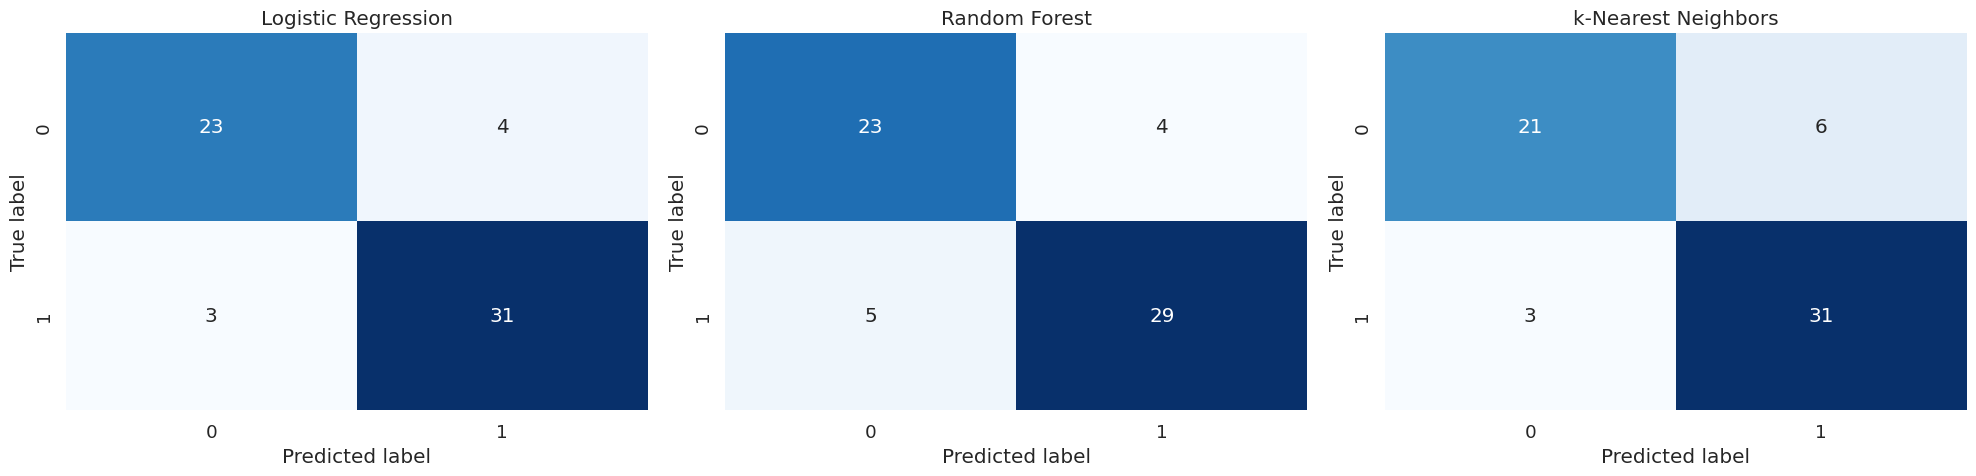

In [611]:
sns.set(font_scale=1.2)
def plot_conf_mx(ax, y_test, y_preds, title):
    sns.heatmap(confusion_matrix(y_test, y_preds),
                annot=True,
                fmt="d",
                cbar=False,
                cmap="Blues",
                ax=ax)
    ax.set_xlabel("Predicted label")
    ax.set_ylabel("True label")
    ax.set_title(title)
fig, axes = plt.subplots(1, 3, figsize=(20, 5))
plot_conf_mx(axes[0], y_test, y_pred_logistic, title="Logistic Regression")
plot_conf_mx(axes[1], y_test, y_pred_rf, title="Random Forest")
plot_conf_mx(axes[2], y_test, y_pred_kneighbor, title="k-Nearest Neighbors")
plt.tight_layout()
plt.show()

#### *So far, we have achieved a strong model with nearly 90% accuracy,and that model is **Logistic Regression**.*

### But we need to do more experiments :

In [612]:
cv_acc = cross_val_score(model_logistic,
                         X,
                         y,
                         cv=5, # 5-fold cross-validation, this is the default
                         scoring="accuracy") # accuracy as scoring
cv_acc

array([0.81967213, 0.8852459 , 0.81666667, 0.88333333, 0.76666667])

In [613]:
cv_acc = np.mean(cv_acc)
cv_acc

np.float64(0.8343169398907104)

### When performing 5-fold cross-validation, the model's accuracy drops by approximately 7%.

In [614]:
cv_precision = np.mean(cross_val_score(model_logistic,
                                       X,
                                       y,
                                       cv=5, # 5-fold cross-validation
                                       scoring="precision")) # precision as scoring
cv_precision

np.float64(0.8320687134502924)

## **so we are doing Hyper parameter tuning .**

In [615]:
log_grid = {"C":np.logspace(-4,4,30),
               "solver":["liblinear"]}
gridsearch_using_logistic = GridSearchCV(LogisticRegression(),
                           param_grid=log_grid,
                           cv=5,
                           verbose=True)

gridsearch_using_logistic.fit(X_train,y_train)

Fitting 5 folds for each of 30 candidates, totalling 150 fits


GridSearchCV(cv=5, estimator=LogisticRegression(),
             param_grid={'C': array([1.00000000e-04, 1.88739182e-04, 3.56224789e-04, 6.72335754e-04,
       1.26896100e-03, 2.39502662e-03, 4.52035366e-03, 8.53167852e-03,
       1.61026203e-02, 3.03919538e-02, 5.73615251e-02, 1.08263673e-01,
       2.04335972e-01, 3.85662042e-01, 7.27895384e-01, 1.37382380e+00,
       2.59294380e+00, 4.89390092e+00, 9.23670857e+00, 1.74332882e+01,
       3.29034456e+01, 6.21016942e+01, 1.17210230e+02, 2.21221629e+02,
       4.17531894e+02, 7.88046282e+02, 1.48735211e+03, 2.80721620e+03,
       5.29831691e+03, 1.00000000e+04]),
                         'solver': ['liblinear']},
             verbose=True)

In [616]:
gridsearch_using_logistic.best_params_

{'C': np.float64(0.008531678524172805), 'solver': 'liblinear'}

In [617]:
gridsearch_using_logistic.score(X_test,y_test)

0.8524590163934426

In [618]:
clf=LogisticRegression(C=0.0085,solver='liblinear')

## Feature importance

### **Feature importance helps determine which features have the most impact on the model's predictions.**

In [619]:
clf.fit(X_train, y_train)
clf.coef_

array([[-0.08354155, -0.18222289,  0.21078583, -0.03747019, -0.02462244,
         0.0019314 ,  0.04740931,  0.18991602, -0.19605864, -0.19524495,
         0.1466064 , -0.19034588, -0.14729143]])

In [620]:
feature_dict=dict(zip(df.columns,list(clf.coef_[0])))

In [622]:
feature_dict

{'age': np.float64(-0.0835415523562807),
 'sex': np.float64(-0.1822228865908938),
 'cp': np.float64(0.21078582912618987),
 'trestbps': np.float64(-0.03747019424021806),
 'chol': np.float64(-0.02462244483053289),
 'fbs': np.float64(0.0019313957681687983),
 'restecg': np.float64(0.04740931240316987),
 'thalach': np.float64(0.18991601917842882),
 'exang': np.float64(-0.19605863669824428),
 'oldpeak': np.float64(-0.1952449527330475),
 'slope': np.float64(0.1466063953200623),
 'ca': np.float64(-0.19034588486111903),
 'thal': np.float64(-0.14729142801491008)}

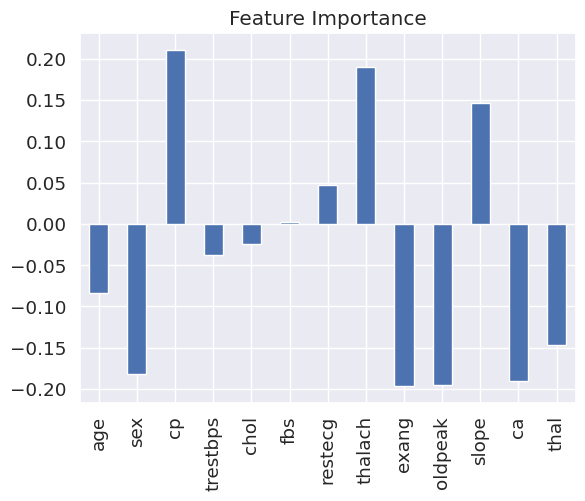

In [623]:
features_df = pd.DataFrame(feature_dict, index=[0])
features_df.T.plot.bar(title="Feature Importance", legend=False);

In [624]:
clf_y_pred=clf.predict(X_test)

In [625]:
print(classification_report(y_test,clf_y_pred))

              precision    recall  f1-score   support

           0       0.85      0.81      0.83        27
           1       0.86      0.88      0.87        34

    accuracy                           0.85        61
   macro avg       0.85      0.85      0.85        61
weighted avg       0.85      0.85      0.85        61



In [626]:
import pkg_resources

with open("requirements.txt", "w") as f:
    for package in pkg_resources.working_set:
        f.write(f"{package.project_name}=={package.version}\n")

